<a href="https://colab.research.google.com/github/waltermayor/DigitalImageProcessing_colab/blob/master/clase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


from google.colab import drive
drive.mount('/content/drive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
# importar librerias necesarias 

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/colab/images/'
os.chdir(path)
!pwd

# graficar imagenes estaticas en el notebook
%matplotlib inline


/content/drive/My Drive/colab/images


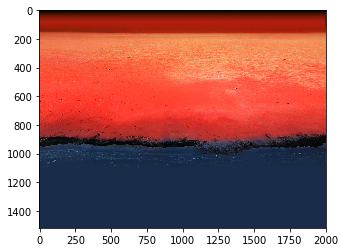

In [20]:
from PIL import Image
 
foto = Image.open('playa.jpg')
 
datos = list(foto.getdata())
 
datos_invertidos = [(255 - datos[x][0], 255 - datos[x][1], 255 - datos[x][2]) for x in range(len(datos))]
 
imagen_invertida = Image.new('RGB', foto.size)
 
imagen_invertida.putdata(datos_invertidos)
 
#imagen_invertida.save('playa2.jpg')
 
plt.imshow(np.asarray(imagen_invertida))


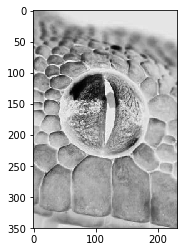

In [21]:
from PIL import Image
 
foto = Image.open('ojo.jpg')
 
datos = foto.getdata()
 
datos_invertidos = [255 - x for x in datos]
 
imagen_invertida = Image.new('L', foto.size)
 
imagen_invertida.putdata(datos_invertidos)
 
#imagen_invertida.save('ruta_y_nombre_del_archivo')
 
plt.imshow(np.asarray(imagen_invertida),cmap='gray')

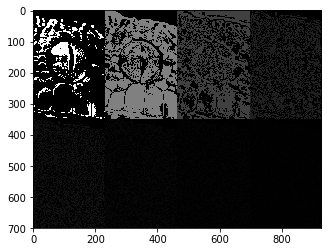

In [26]:
img = cv2.imread('ojo.jpg',0)
 
#Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits
 
# We have a list of strings where each string represents binary pixel value. To extract bit planes we need to iterate over the strings and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])
 
#Concatenate these images for ease of display using cv2.hconcat()
finalr = cv2.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
finalv =cv2.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])
 
# Vertically concatenate
final = cv2.vconcat([finalr,finalv])
plt.imshow(final,cmap='gray')

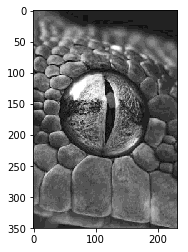

In [28]:
new_img = eight_bit_img+seven_bit_img+six_bit_img+five_bit_img
plt.imshow(new_img,cmap='gray')